# Start Here

#### We now have our clean dataset saved as "data.csv". In the following, we are will explore our dataset. I came up with a few questions and I will attempt to find the answers.

# Storytelling

#### Importing relevant packages and also load the csv file.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

data = pd.read_csv('data.csv')

## Q: Where are the Airbnbs located?

#### This is a very general question that can lead to more specific questions.

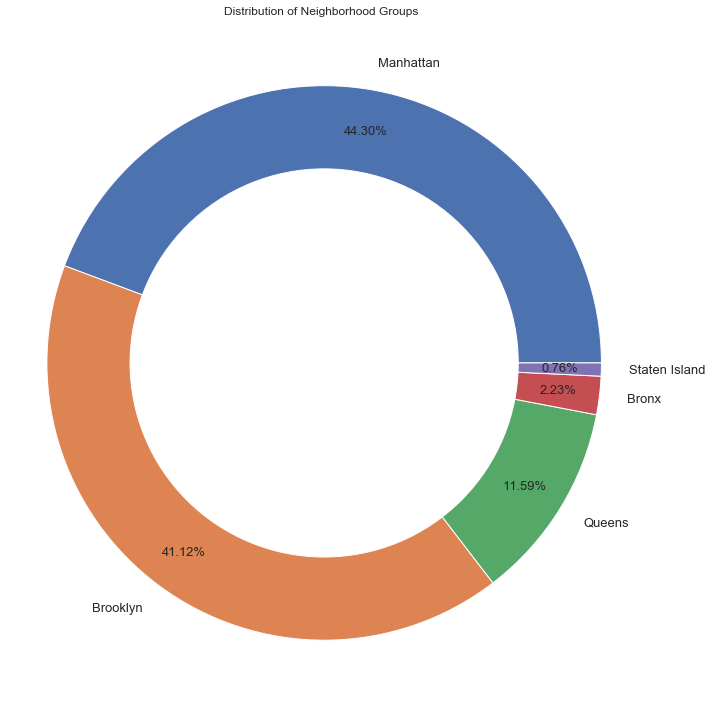

Bronx has 1091 Airbnb listings.
Brooklyn has 20104 Airbnb listings.
Manhattan has 21661 Airbnb listings.
Queens has 5666 Airbnb listings.
Staten Island has 373 Airbnb listings.


In [15]:
fig,ax=plt.subplots(figsize=(10,10))
data['neighbourhood_group'].value_counts().plot.pie(pctdistance=0.85,autopct='%1.2f%%', textprops={'fontsize': 13})
ax.set_title('Distribution of Neighborhood Groups')
ax.set_ylabel('')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.show()


for x in data['neighbourhood_group'].sort_values().unique():
    print(x + ' has '+ str(len(data[data['neighbourhood_group'] == x])) + ' Airbnb listings.')

In [24]:
for x in data['room_type'].sort_values().unique():
    print(x + ' has '+ str(len(data[data['room_type'] == x])) + ' Airbnb listings.')

Entire home/apt has 25409 Airbnb listings.
Private room has 22326 Airbnb listings.
Shared room has 1160 Airbnb listings.


#### Looking at this pie/donut chart, we can see that most of our data are located in Manhattan and Brooklyn. Some are in Queens with very few are in Bronx and Staten Island.

## Q: What is the distribution of room type in the 5 New York City boroughs?

#### Another general question but provide us with a better understanding of each boroughs.

In [5]:
# Just storing this for future use
ny_boroughs = data['neighbourhood_group'].sort_values().unique()
print(ny_boroughs)

['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']


In [6]:
# Again, just storing this for future use
room_types = data['room_type'].sort_values().unique()
print(room_types)

['Entire home/apt' 'Private room' 'Shared room']


In [7]:
# I want to display the distribution of room type for each NY City Boroughs

#Building a dictionary for the bar chart
room_type_bar = {}
for y in room_types:
    temp_list = []
    for x in ny_boroughs:
        temp_list.append(data.room_type[data['neighbourhood_group'] == x].value_counts()[y])
    room_type_bar[y]=temp_list

room_type_bar

{'Entire home/apt': [379, 9559, 13199, 2096, 176],
 'Private room': [652, 10132, 7982, 3372, 188],
 'Shared room': [60, 413, 480, 198, 9]}

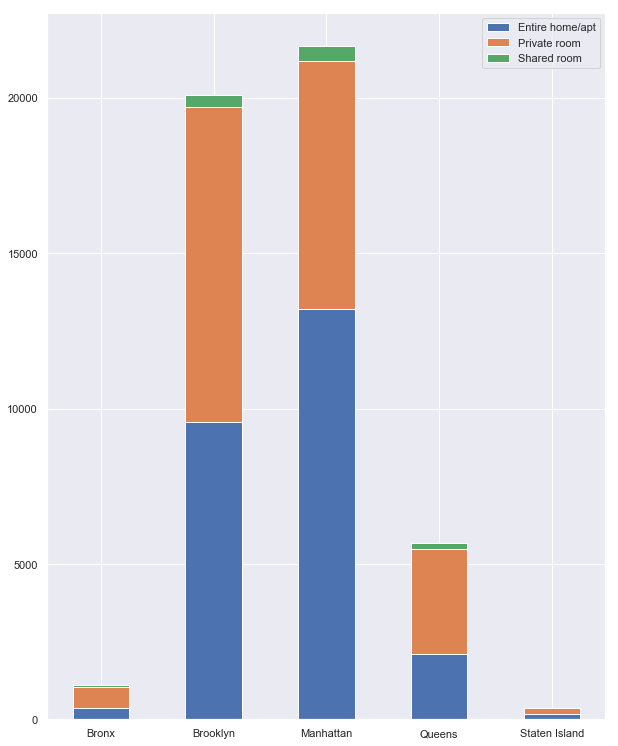

In [25]:
r = np.arange(5)
bars1 = room_type_bar['Entire home/apt']
bars2 = room_type_bar['Private room']
bars3 = room_type_bar['Shared room']
bars = np.add(bars1, bars2).tolist()

fig, ax = plt.subplots(figsize=(10,13))
ax.bar(r, bars1, edgecolor='white', width=.5)
ax.bar(r, bars2, bottom=bars1, edgecolor='white', width=.5)
ax.bar(r, bars3, bottom=bars, edgecolor='white', width=.5)

plt.xticks(r, ny_boroughs)
plt.legend(room_types)
plt.show()

#### Just like the pie chart, the bar chart again show how disproportion the listings are distributed. However, it is not hard to see that the most common type of accomodation are private room and entire house/apt in all borough.


## Q: What is the price distribution based on borough and room type?

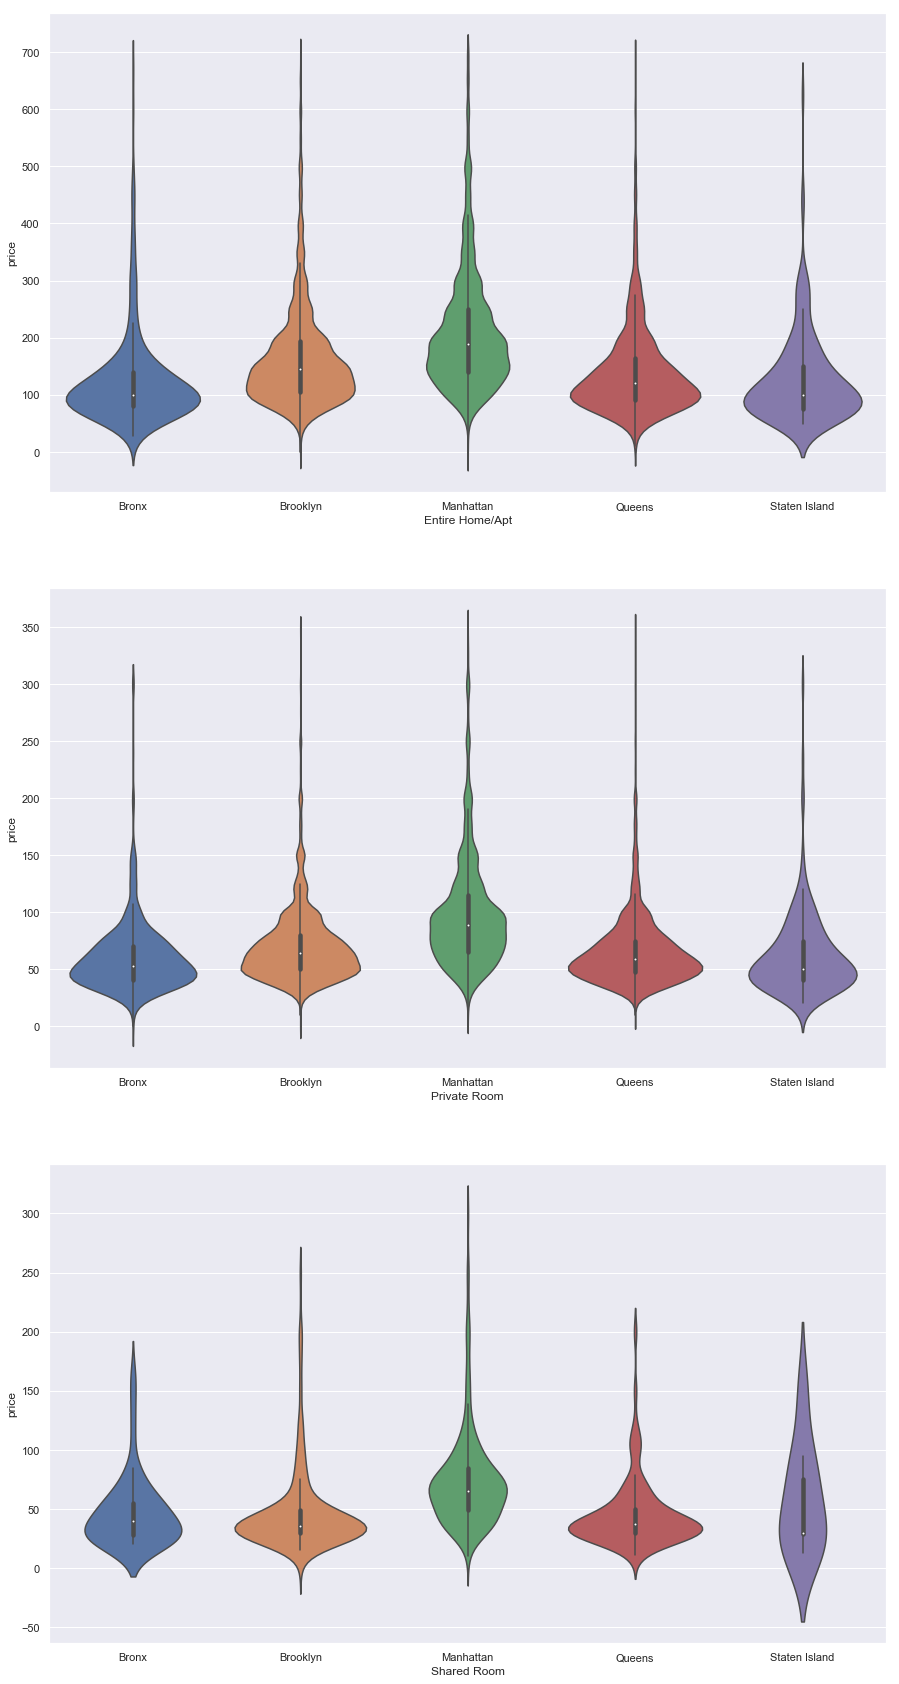

In [22]:
# From now on, I will frequently refer the room type as follow:
# eh = Entire home/apt
# pr = Private Room
# sr = Shared Room

# I have set visualized a few price points and this is a level option that will show most of the distribution of price
data_eh = data[(data['room_type'] == 'Entire home/apt') & (data['price'] < 700)].sort_values('neighbourhood_group')
data_pr = data[(data['room_type'] == 'Private room') & (data['price'] < 350)].sort_values('neighbourhood_group')
data_sr = data[(data['room_type'] == 'Shared room') & (data['price'] < 300)].sort_values('neighbourhood_group')

fig, ax = plt.subplots(nrows=3, figsize=(15,30))

violin_eh=sns.violinplot(data=data_eh, x='neighbourhood_group', y='price', ax=ax[0])
violin_pr=sns.violinplot(data=data_pr, x='neighbourhood_group', y='price', ax=ax[1])
violin_sr=sns.violinplot(data=data_sr, x='neighbourhood_group', y='price', ax=ax[2])

ax[0].set_xlabel('Entire Home/Apt')
ax[1].set_xlabel('Private Room')
ax[2].set_xlabel('Shared Room')

plt.show()

#### We can see that the median price of a room in Manhattan costs a lot more than the other 4 boroughs, across all room types.

##### Just crossed my mind that after placing a price limit, how does that affect the borough proportion on my data?

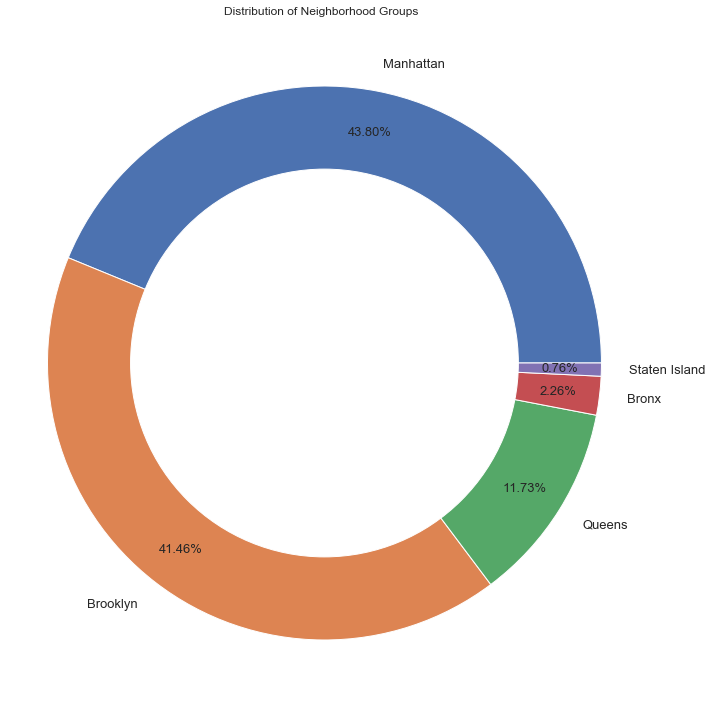

Bronx has 1086 samples.
Brooklyn has 19947 samples.
Manhattan has 21073 samples.
Queens has 5644 samples.
Staten Island has 367 samples.


In [10]:
# Rerunning my pie chart with price limit $600.00

fig,ax=plt.subplots(figsize=(10,10))
data[data['price'] <= 600]['neighbourhood_group'].value_counts().plot.pie(pctdistance=0.85,autopct='%1.2f%%', textprops={'fontsize': 13})
ax.set_title('Distribution of Neighborhood Groups')
ax.set_ylabel('')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.show()


for x in data[data['price'] <= 600]['neighbourhood_group'].sort_values().unique():
    print(x + ' has '+ str(len(data[(data['neighbourhood_group'] == x) & (data['price'] <= 600)])) + ' samples.')

#### The pie chart did not change much even after I imposed a $600.00 ceiling on the Airbnb price.

## Q: What is the room type distribution like on the map?

#### Just curious of what it looks like on the map. This may help identify the preference/demand of room type in certain area.

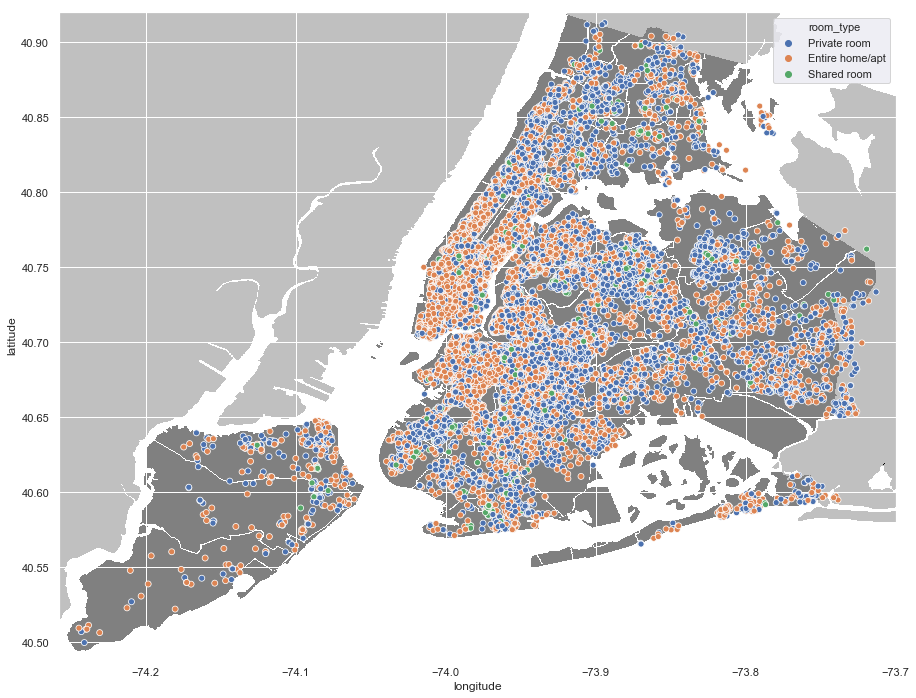

In [23]:
import urllib

plt.figure(figsize=(15,12))

i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49, 40.92])
ax=plt.gca()

sns.scatterplot(data.longitude,data.latitude,hue=data.room_type, ax=ax)

plt.show()

#### I was surprised by the concentration of entire house/apt in downtown Manhattan. This extend to the side of Brooklyn that is near downtown Manhattan.

## Q: What is the price distribution like on the map?

#### Like the other map, this may help identify where are the high price(or low price) areas are.

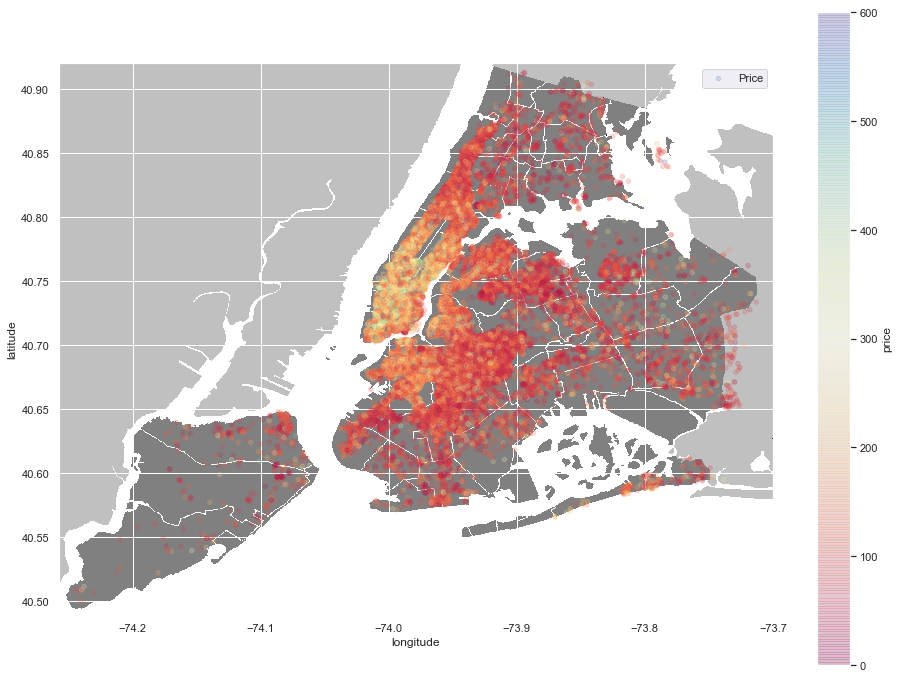

In [28]:
import urllib

plt.figure(figsize=(16,12))

# Using the finding from the violin plot, want to only include prices that make the most sense.
data_cmap = data[data['price'] <= 600]

i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
# Scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49, 40.92])
ax=plt.gca()

data_cmap.plot(kind='scatter', x='longitude', y='latitude', label='Price', c='price', ax=ax, cmap=plt.get_cmap('Spectral'), colorbar=True, alpha=0.2, zorder=5)
plt.legend()
plt.show()

#### Downtown Manhattan, and side of Brooklyn/Queens that is near downtown Manhattan, are where the expensive listings are. 

## BONUS: Using folium to create an interactive map with defined attributes.

#### This is an interactive map that shows the listings with the following criterias:
1. Maximum listing price is $90.00.
2. Minimum reviews of the listing is 15.
3. The listing is a private room.
4. The listing is in Manhattan.


In [13]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins

base_map=folium.Map([40.693943, -73.985880],zoom_start=12)

base_map_rooms=plugins.MarkerCluster().add_to(base_map)

max_price = 90

min_reviews = 15

roomtype = 'Private room'

borough = 'Manhattan'

map_data = data[(data['price'] <= max_price) & (data['number_of_reviews'] >= min_reviews) & (data['room_type'] == roomtype) & (data['neighbourhood_group'] == borough)]

for lat,lon,pr in zip(map_data.latitude,map_data.longitude,map_data.price):
    folium.Marker(location=[lat,lon],icon=folium.Icon(color='red', icon='info-sign'),popup=('$'+ str(pr))).add_to(base_map_rooms)
base_map.add_child(base_map_rooms)

base_map

## Summary/Conclusion
#### Without diving too deep into the data, here are my observations: 
- First, I found out that most of the listings are located in Brooklyn and Manhattan. 
- Then I learned that the popular room types are entire house/apt and private room. 
- I looked into the pricing and I saw that Manhattan is considerable more expensive than other borough. 
- Next, I plotted the room type on the map and learned that entire house/apt and private room are evenly distributed across all 5 boroughs of New York City, except in/near downtown Manhattan--mostly entire house/apt listings
- Furthermore, using heatmap, the listing prices don't look all different across all 5 boroughs, except when it is in/near downtown Manhattan.
